### Linear Regression

Hypothesis / Equation:

y = mx + c / f(x) = θ₀x + θ₁
- y: output
- x: input variable
- m: slope (weight)
- c: y-intercept (bias)

Find a linear line to fit the data:

Caluclate the error / cost, and adjust weight, bias based on error

Cost function J(θ₀, θ₁, ..., θₙ):

MSE*: (1/n) * Σ(y - ŷ)² = (1/n) * ((y₁ - ŷ₁)² + (y₂ - ŷ₂)² + ... + (yₙ - ŷₙ)²)

MAE: (1/n) * Σ|y - ŷ| = (1/n) * (|y₁ - ŷ₁| + |y₂ - ŷ₂| + ... + |yₙ - ŷₙ|)

Remember y = mx + c / f(x) = θ₀x + θ₁

f(x) vs J(θ₀, θ₁, ..., θₙ):

- f(x) is the hypothesis of the model
- For describing the relationship between output and variables

- J() is the cost function
- For describing the relationship between cost and weights

Gradient Descent:

adjust the weight with learning rate * slope / gradient
when cost approach bottom of bowl, the gradient become less steep

θₙ = θₙ - α * ∂J()/∂θₙ
- θₙ: n-th weight 
- α: learning rate (decide the step size of weight adjustment / descent speed)
- ∂J()/∂θₙ: partial derivative respect to n-th weight (calculate the slope of a point ((θₙ, J(θ₀, θ₁, ..., θₙ))) )

update weights from 0 to n-th

In [88]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    bias = 0
    costs = []

    for i in range(num_iterations):
        # Calculate predictions
        # .dot(X, weights) = Σ(θₙxₙ)
        # this is the hypothesis of 
        # Multiple Regression: hθ(x) = θ₀ + θ₁x₁ + θ₁x₁ + ... + θ₂x₂ + θₙxₙ
        y_pred = np.dot(X, weights) + bias
        
        # Calculate the gradients / partial derivative
        dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
        db = (1/num_samples) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Calculate the cost (mean squared error)
        cost = np.mean((y_pred - y) ** 2)
        costs.append(cost)
        
    return weights, bias, costs

After gradient descent and display the cost weight graph respect to θₙ:
- y-axis: cost
- x-axis: θₙ (n-th weight)

You can see it as a half bowl shape, where cost descent to the bottom and weight increase or decrease

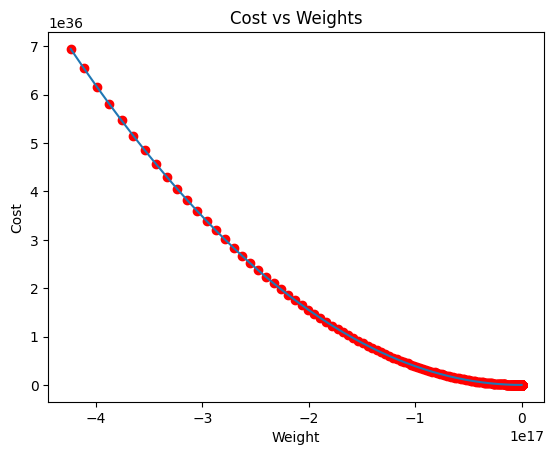

In [89]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def gradientDescent (x, y, iterations = 1000, learning_rate = 0.0001
                     , stopping_threshold = 1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None
    
    for i in range(iterations):

        y_pred = (current_weight * x) + current_bias

        current_cost = mean_squared_error(y, y_pred)

        if previous_cost and abs(previous_cost - current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        w_derivative = (1/n) * np.sum(x.T * (y - y_pred))
        b_derivative = (1/n) * np.sum(y - y_pred)

        current_weight -= (learning_rate * w_derivative)
        current_bias -= (learning_rate * b_derivative)

    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias


train_data = pd.read_csv('Positions_salaries.csv')

X = train_data[['Level']]
Y = train_data['Salary']

X = X.to_numpy()
Y = Y.to_numpy()

Y = Y.reshape(-1, 1)

estimated_weight, estimated_bias = gradientDescent(X, Y)

### We can use model from sklearn to do Linear Regression

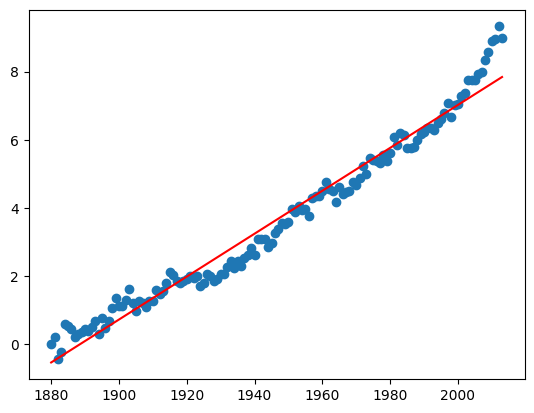

In [90]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_data = pd.read_csv('epa-sea-level.csv')

# X as input data
# y as output data
X = train_data[['Year']]  # Input predictor variable
y = train_data['CSIRO Adjusted Sea Level']  # Output target variable

# create a linear regression model with X and y
model = LinearRegression()
model.fit(X, y)

# make the linear prediction line with X
y_pred = model.predict(X)

# draw the graph
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### Polynomial Regression

There are data cannot be represent / fit by a straight line

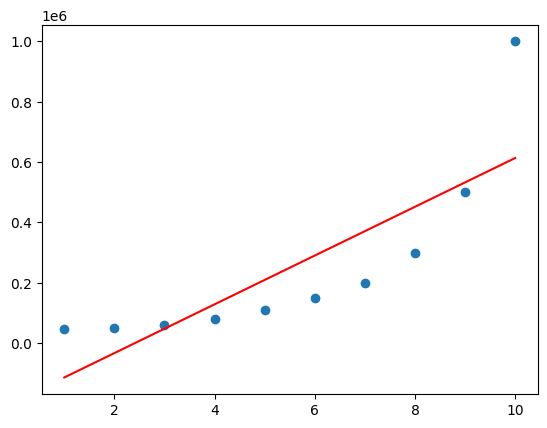

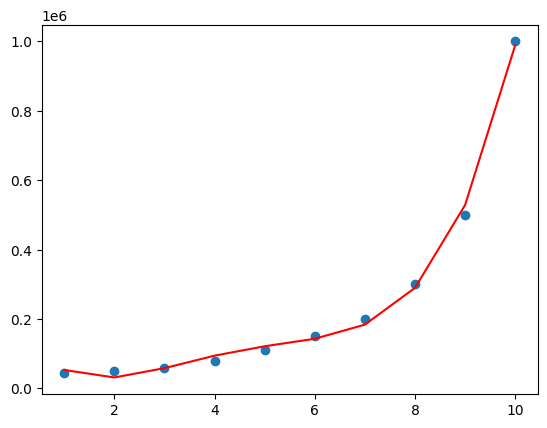

In [91]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read the data from the CSV file
train_data = pd.read_csv('Positions_salaries.csv')

# Linear Regression
X = train_data[['Level']]  # Input predictor variable
y = train_data['Salary']  # Output target variable

# Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

y_pred = lr_model.predict(X)

# Plot the actual data points and the linear regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# Polynomial Regression
poly_feat = PolynomialFeatures(degree=4)  # Create a polynomial feature transformer

X_poly = poly_feat.fit_transform(X)  # Transform the input data into polynomial features

# Create and fit a polynomial regression model
pr_model = LinearRegression()
pr_model.fit(X_poly, y)

y_pred = pr_model.predict(X_poly)

# Plot the actual data points and the polynomial regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### Overfitting

when a machine learning model performs well on the training data but fails to generalize well to unseen data

Causes:
- training dataset is small
- large number of variables (too complex)

Solutions:
- Diverse large number of dataset
- Regularization
- Feature selection

Regularization (apply to cost function):

L1 (Lasso): (1/n) * { Σ(y - ŷ)² + λ * Σ|coefficient| } 
(Σ|coefficient| = |coefficient_1| + |coefficient_2| + ... + |coefficient_n|)
- It will drive some weights to 0
- Which helps identifying import variables
- remove variables with weight = 0

L2 (Ridge): (1/n)* { Σ(y - ŷ)² + λ * Σ(coefficient²) }
(Σ(coefficient²) = coefficient_1² + coefficient_2² + ... + coefficient_n²)
- penalizes the squared magnitudes of the weights
- reducing the impact of extreme values in the training data


### Feature Scaling

Variables may have different magnitude / range
eg. ages: 0-100, but salary: 0-millions

Regularization without feature scaling can be unfair

We need to make variables on similar scales

Standardizing:
z = (xi - μ) / σ
- xi: i-th value of a variable
- μ: mean of the variable
- σ: standard deviation of the variable = sqrt(1/n * Σ(x - μ)^2)

We can use StandardScaler() from sklearn

In [92]:
# CAN CHECK LAB3 Q2

from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature data and transform the feature
standardized_feature = scaler.fit_transform(feature_data)

NameError: name 'feature_data' is not defined

Normalizing: 
x_scaled = (xi - x_min) / (x_max - x_min)
- xi: i-th value of the variable
- x_min: min value of the variable
- x_max: max value of the variable
- x_scaled: normalized i-th value of the variable (value will between 0 to 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform the feature
normalized_feature = scaler.fit_transform(feature_data)

### Perceptron Algorithm in 線性分類

Linear boundary (decision boundary):
Σ(θₙxₙ) + b = 0
- θₙxₙ: n-pairs of variable and weights
- b: bias

To make binary classification (0 or 1 / true or false / anything that have only 2 classes)

Step function:
Σ(θₙxₙ) + b >= 0: 1
Σ(θₙxₙ) + b < 0: 0

(only variables count in dimensions, bias not)

And, Or, Xor perceptrons:

Single layer where 2 input neurons and one output neurons

Xor need 2 input neurons, 2 hiddern neurons, and 1 output neuron

And: output 1 inputs(1, 1)
Or: output 1 inputs(1, 1), (1, 0), (0, 1)
Xor: output 1 inputs(1, 0), (0, 1)

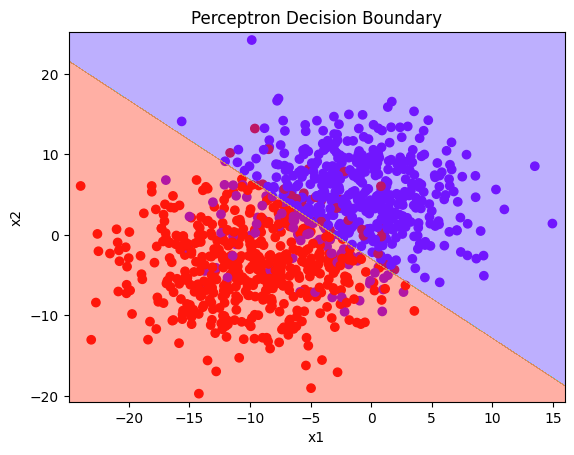

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def sign(z):
    return np.where(z >= 0, 1, 0)
    
# X should be a 2d array (2xdata_size) and y should be 1d array
def perceptron(X, y, num_iterations=1000):
    data_size, feature_size = X.shape
    w = np.array([0., 0.])
    b = 0
    learning_rate = 0.01

    for iteration in range(num_iterations):
        for i in range(data_size):
            # x contains x1 and x2 at index i
            x = X[i]
            y_true = y[i]
            z = np.dot(x, w) + b
            output = sign(z)

            if output != y_true:
                if y_true == 1:
                    w = w + learning_rate * x
                    b = b + learning_rate
                else:
                    w = w - learning_rate * x
                    b = b - learning_rate

    return w, b


# 1000 samples
# 2 classes (centers)
# 2 variables (features)
# random seed for reproducibility (ensure same dataset generate everytime)
# standard deviation of the cluster (how much the data point spread)
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=5)

# X dataframe with x1 and x2 as variables
X_df = pd.DataFrame(X, columns=['x1', 'x2'])
# turn it into a np array
X_array = X_df.values
# y dataframe with classes
y_df = pd.DataFrame(y, columns=['class'])
# turn it into a np array
y_array = y_df.values.flatten()

# get weights and bias from model
w, b = perceptron(X_array, y_array)

# draw the graph
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

# Plotting the decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = sign(np.dot(np.c_[xx1.ravel(), xx2.ravel()], w) + b)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='rainbow')

# Setting labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary')

# Displaying the plot
plt.show()

### Decision Tree (See take home assignment 2)

It is like a series of if-then statements, following a particular path within the tree leads to specific outcomes or decisions

My understanding (dk its correct or not):

In a decision tree, when a node is split based on a feature, it's possible that the resulting child nodes may still contain samples from multiple classes

if the initial split is made based on the feature of "hardworking," it's possible that the resulting child nodes may contain individuals who are both successful and unsuccessful. To create purer nodes, additional splits can be made based on other relevant features such as background, education, skills, or any other factors that might contribute to success.

we need to find some of the most critical features to split the data because they have the bigger influence to the output classes

- Used for classification or regression
- Nodes represent features and contains output classes
- selects the best feature to split the data based on a splitting criterion (Gini impurity for classification, mean squared error for regression)
- split recursively until a stopping criterion is met (maximum depth, minimum number of samples in a node, or when further splits don't improve the model significantly)
- The goal of splitting is to create homogeneous nodes where most of the samples belong to the same class (for classification) or have similar target values (for regression).
- Features that result in the greatest reduction in impurity or increase in information gain (lower Entropy (less classes mixed in a node)) are considered more important and are likely to be selected for splitting earlier in the tree-building process.

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

titanic_data = pd.read_csv('Take-home2_data.csv')

# y
survived_output = titanic_data['Survived']
# X
features_raw = titanic_data.drop('Survived', axis=1)
# X remove names
features_without_names = features_raw.drop('Name', axis=1)
# One hot encoding (Turn data in a variable into different class(0, 1, 2, ...))
# only variables of categories
features = pd.get_dummies(features_without_names)
# fill in any empty cells (na / N/A) with zeros
# final X
features = features.fillna(0.0)

# split training and testing data using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, survived_output, test_size=0.2, random_state=42)

# use decision tree model from sklearn to train
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# get y_preds with X_train
y_train_preds = model.predict(X_train)
# get y_preds with X training set
y_test_preds = model.predict(X_test)

# get accuracy score using sklearn
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)
print('The prediction accuracy on the training data is', train_accuracy)
print('The prediction accuracy on the testing data is', test_accuracy)

The prediction accuracy on the training data is 1.0
The prediction accuracy on the testing data is 0.8156424581005587


But we can see the model is overfitted

training data all prediction correct, but testing prediction not really accurate

we can use hyperparameters to fix the overfitting
- max_depth
- min_samples_leaf
- min_samples_split

In [ ]:
# Adjust hpyerparameters to fix over or underfitting
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)
print('The prediction accuracy on the training data is', train_accuracy)
print('The prediction accuracy on the testing data is', test_accuracy)

The prediction accuracy on the training data is 0.8904494382022472
The prediction accuracy on the testing data is 0.8547486033519553


### Neural Network

Deep learning:
- part of ML based on artifical NN
- inspired by biological NN
- fire output to other neurons if inputs strong enough (activation functions)
- connections are not all equal, some of them are more important (weights)

Neural Network:
- each neuron have a value xₙ and connect to every neurons at next layer, each connection associate with a weight (θₙ)
- So if previous layer has 4 neurons and next layer has 3 neurons, totally 12 weights (connection)
- each neuron (in hidden and output layers) will receive y = Σ(θₙxₙ) + b (each neuron have their own bias) from previous layers
- the output of the neuron will based on the activation function (Step, Sigmoid, ReLu...)

Backpropagation
1. Do a feedforward operation
2. Compare the output with the desired output
3. Calculating the error (Cost function)
4. Run backpropagation to spread the error into each weight (dJ()/d)
5. Update the weights and get a better model
6. Continue with Steps 1-5 until we have a good model

### NN Practice

Framework for building and training NN:
- TensorFlow
- PyTorch

The basic structure of a NN is a tensor:
- 1d tensor is vector
- 2d tensor is a matrix
- 3d tensor is ndarray

We will use the handwriting dataset from MNIST to do the hadnwriting recognition NN

torch.Size([64, 1, 28, 28])
torch.Size([64])


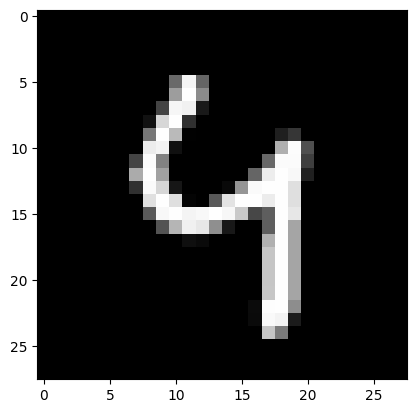

In [93]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# define a transform to tranform data to a tensor and normalized the data
defined_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

# download the MNIST dataset and apply transform to it
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', 
                          download=True, train=True, 
                          transform=defined_transform)

# create a trainloader allow loop through dataset when training nn
# randomly re-ordered during each epoch or iteration when shuffle = true
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# get 64 samples from trainloader (batch size 64)
iter_data = iter(trainloader)

# lets see how the image looks like 
# remember the dataset shuffle before every iteration so image will be different everytime
images, labels = next(iter_data)
print(images.shape) # torch.Size([64, 1, 28, 28]) 64 images thats 28x28 pixels with 1 color channel so it is a matrix
print(labels.shape) # torch.Size([64]) 64 images with 64 labels (number 0-9)
plt.imshow(images[3].numpy().squeeze(), cmap='Greys_r') # image at index 3

Start building the NN !

In [94]:
input_size = 784 # image 28x28 pixels
hidden_sizes = 256
output_size = 10 # indentify number 0-9

# Use OrderedDict to name the individual layers and operations
from collections import OrderedDict
from torch import nn

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
    # will auto setup weights and bias and calculate the 256 outputs
    ('Step 1', nn.Linear(input_size, hidden_sizes)),
    # Sigmoid activation
    ('Step 2', nn.ReLU()),
    # Hidden to output layer with softmax activation
    ('Step 3', nn.Linear(hidden_sizes, output_size)),
    # softmax activation usually used in multi-class classifications
    # probability distribution of categories that tells us which category the image might belong to    
    # In practice, we usually use log-softmax output instead of softmax output
    ('Step 4', nn.LogSoftmax(dim=1))]))

# Lets feedforward ONE image to the network first

# first, flatten the 2d images to 1d vectors
# image.shape = torch.Size([64, 1, 28, 28]), images.shape[0] = 64 the batch size
images = images.view(images.shape[0], 1, 784)
# ps will be a 1d vector with size [1, 10]
# and output will be like tensor([[0.1413, 0.0921, 0.1039, 0.0926, 0.0728, 0.1151, 0.1224, 0.0671, 0.1018, 0.0909]], grad_fn=<SoftmaxBackward0>)
ps = model.forward(images[0]) 


Start training the NN !

In [95]:
# define the cost function first
# Negative Log Likelihood Loss which is a Cost Function again
criterion = nn.NLLLoss()

from torch import optim
# define the optimizer
# which means the method we update the weights and bias
# usually these kind of optimizers are based on Gradient descent
# we will use stochastic gradient descent (SGD) here
optimizer = optim.SGD(model.parameters(), lr=0.003) # pass in weights, bias (parameters) and learning rate

epoches = 10

for e in range(epoches):
    # cost should be 0 when start an epoche
    total_cost = 0
    for images, labels in trainloader:
        # clear the gradient before every feedforward and backpropagation
        optimizer.zero_grad()
        # flatten images
        images = images.view(images.shape[0], -1)
        # feedforward
        outputs = model.forward(images)
        # get cost using cost function defined
        cost = criterion(outputs, labels)
        # backpropagation
        cost.backward()
        # update weights and bias using the optimizer
        optimizer.step()
        # update total cost
        total_cost += cost.item()

    print(f"Training loss: {total_cost/len(trainloader)}")

Training loss: 1.2657624727119006
Training loss: 0.563085567309404
Training loss: 0.4417330293195334
Training loss: 0.39316074933006817
Training loss: 0.36561785182401313
Training loss: 0.3468110333881907
Training loss: 0.3326752947877719
Training loss: 0.32168825487020425
Training loss: 0.31188013582532087
Training loss: 0.30355528877901117


Lastly we make prediction !

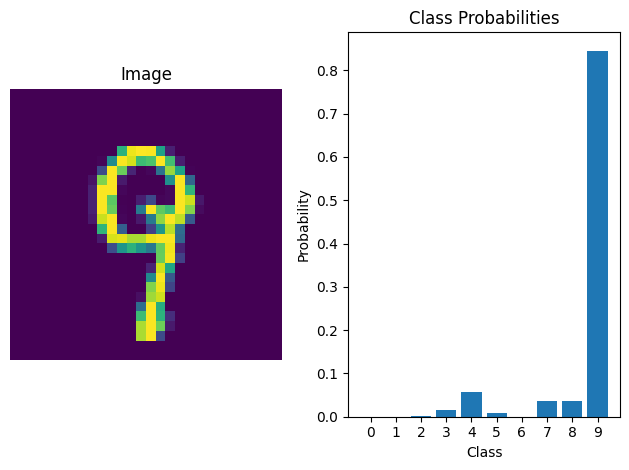

In [106]:
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    test_output = model.forward(img)

probabilities = torch.exp(test_output)
classes = np.arange(10)

# Convert the probabilities and classes to NumPy arrays for plotting
probabilities = probabilities.numpy().squeeze()
classes = classes.astype(str)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img.view(1, 28, 28).squeeze())
plt.axis('off')
plt.title('Image')

# Plot the probabilities
plt.subplot(1, 2, 2)
plt.bar(classes, probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Class Probabilities')

plt.tight_layout()
plt.show()

### Advance Image Recognition (Cat Dog)

In [107]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torchvision.models as models
from torch import nn

data_dir = 'Cat_Dog_data'

# define transforms for both training nad testing set
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
]) 

test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

# get training and testing sets and set their transforms
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

# create loaders for iteration whhen training and testing model
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16)

Build the NN

In [108]:
# we will use the DenseNet model from torchvision.models 
# which is a deep learning architecture
model = models.densenet121(pretrained=True)

# freeze the weights and bias so that we don’t backpropagate through them
for param in model.parameters():
    param.requires_grad = False

# set the model classifier
model.classifier = nn.Linear(in_features=1024, out_features=1000)

# deep NN cannot use CPU to train, it will take too long
# we use GPU if it is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# put model to GPU
model.to(device)

c:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jimmy\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Train the model

In [111]:
from torch import optim

# define cost function again
# we use the CrossEntropyLoss which often used in classifiction task
criterion = nn.CrossEntropyLoss()

# define optimizer for adjusting weights and bias
# we use Adam here
optimizer = optim.Adam(model.parameters(), lr=0.001)

epoches = 10

for e in range(epoches):
    # set to training mode
    model.train()
    total_cost = 0
    for images, labels in trainloader:
        # reset gradients before every feedforward and backpropagation
        optimizer.zero_grad()
        images, labels = images.to(device), labels.to(device)
        outputs = model.forward(images)
        cost = criterion(outputs, labels)
        # backpropagation
        cost.backward()
        # update weights and bias
        optimizer.step()

        total_cost += cost.item()

    print(f"Epoch {e+1} completed.")
    print(f"Training loss: {total_cost/len(trainloader)}")

    # set to evaluation mode
    model.eval()
    total_test_cost = 0
    accuracy = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            test_outputs = model.forward(images)
            test_cost = criterion(test_outputs, labels)
            total_test_cost += test_cost.item()

            ps = torch.exp(test_outputs)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    print(f"Test loss: {total_test_cost/len(testloader):.3f}.. "
        f"Test accuracy: {accuracy/len(testloader):.3f}")

Epoch 1 completed.
Training loss: 1.7178276014328002
Test loss: 0.421.. Test accuracy: 0.942
Epoch 2 completed.
Training loss: 0.4384298324584961
Test loss: 0.248.. Test accuracy: 0.966
Epoch 3 completed.
Training loss: 0.3524690669775009
Test loss: 0.178.. Test accuracy: 0.976
Epoch 4 completed.
Training loss: 0.2763725620508194
Test loss: 0.151.. Test accuracy: 0.966
Epoch 5 completed.
Training loss: 0.29187671303749085
Test loss: 0.132.. Test accuracy: 0.971
Epoch 6 completed.
Training loss: 0.260570732653141
Test loss: 0.113.. Test accuracy: 0.971
Epoch 7 completed.
Training loss: 0.22974500209093093
Test loss: 0.106.. Test accuracy: 0.981
Epoch 8 completed.
Training loss: 0.24215225607156754
Test loss: 0.103.. Test accuracy: 0.971
Epoch 9 completed.
Training loss: 0.187661239951849
Test loss: 0.102.. Test accuracy: 0.966
Epoch 10 completed.
Training loss: 0.20510392904281616
Test loss: 0.101.. Test accuracy: 0.966


Get a random image from testing set to test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is classified as: cat


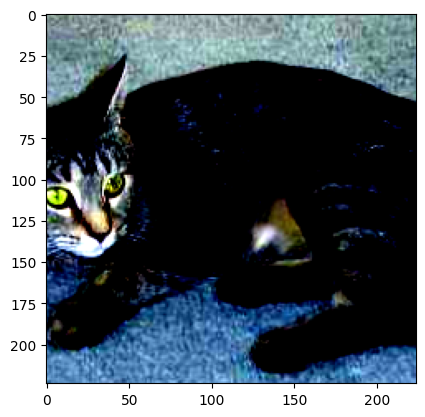

In [127]:
images, labels = next(iter(testloader))
img = images[13]
img = img.swapaxes(0, 1)
img = img.swapaxes(1, 2)
plt.imshow(img)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs, labels = images.to(device), images.to(device)

model.eval()
with torch.no_grad():
    output = model.forward(inputs[0].view(1, 3, 224, 224))
    # Interpret the results
    probabilities = torch.exp(output)
    class_index = torch.argmax(probabilities, dim=1).item()
    class_label = train_data.classes[class_index]

    print(f"The image is classified as: {class_label}")


### Clustering

Clustering is one of the most popular unsupervised approaches:
- Market Segmentation
- Social Network Analysis
- Organizing Computing Clusters
- Clustering is Subjective

K-mean algroithm can be used to cluster data

'K' is a hyperparameter that represents the number of clusters you have in your dataset

How to determine K:
- Choose K as the number of clusters you believe
- Elbow method

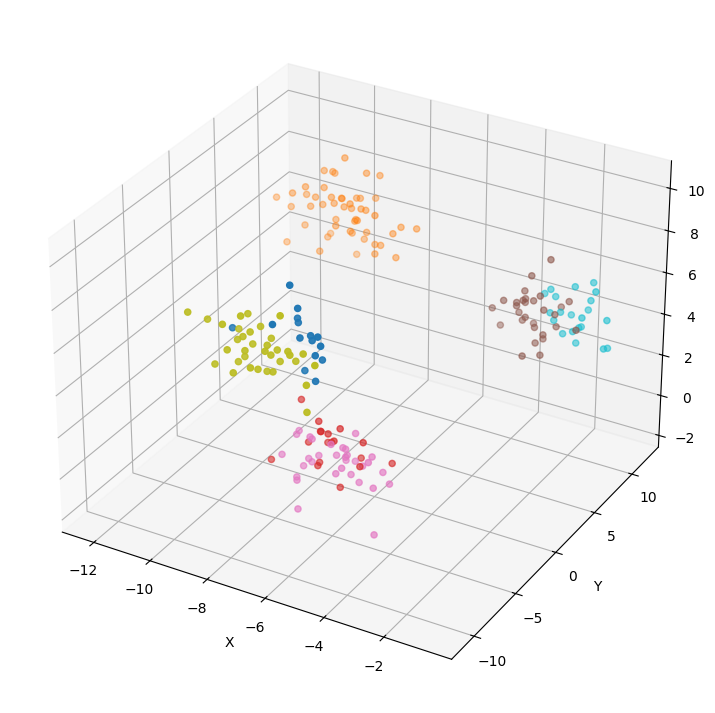

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
dataset, _ = make_blobs(n_samples=200, n_features=5, centers=4, random_state=42)

# Perform K-means clustering
kmeans = KMeans(n_clusters=7)
model = kmeans.fit(dataset)
labels = model.predict(dataset)

# Visualize the clusters in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=labels, cmap='tab10')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


Elbow method

The graph of it will be 
- the average distance from the center of the cluster to each point (SSE on the y-axis)
- number of clusters (on the x-axis)

At a certain point, adding new 
clusters will no longer cause a significant decrease 
in the average distance. This point is referred to as 
the elbow

The cluster number of the elbow should be the number we set for the K-mean algorithm

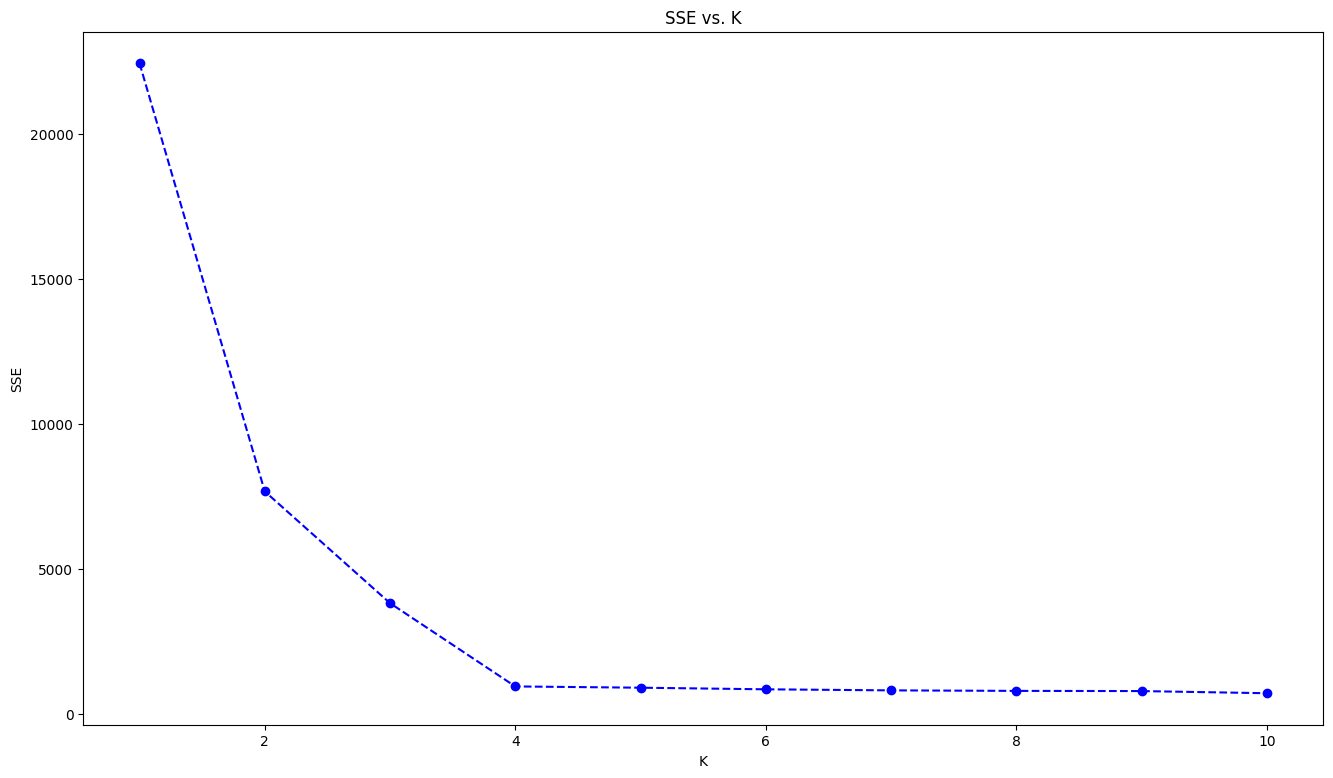

In [21]:
# set the cluster number range we want to test
centers = list(range(1, 11))
# emtpy SSE array
SSE_arr = []

# create a method that get Sum of Squared Errors (SSE) from dataset
def get_kmean_sse(dataset, center):
    # setup a kmeans model based on the number of center given
    kmeans = KMeans(n_clusters=center)
    # train the model
    model = kmeans.fit(dataset)
    # Sum of squared distances of samples to their closest cluster center
    return model.inertia_

# from 1 to 10 centers 
# get their SSE
for center in centers:
    SSE_arr.append(get_kmean_sse(dataset=dataset, center=center))

plt.plot(centers, SSE_arr, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

We can see after 4 Clusters, no significate decrease in SSE

So 4 clusters is optimal for K-means model in this dataset

### Data Manipulation and analysis in python

In [ ]:
# Ways to set a pandas Dataframe
# 1. dictionary
data = {'column1': [value1, value2, ...], 'column2': [value1, value2, ...]}
df = pd.DataFrame(data)

# 2. np array
array = np.array([[value1, value2, ...], [value1, value2, ...]])
df = pd.DataFrame(array, columns=['column1', 'column2', ...])

# 3. csv
df = pd.read_csv('filename.csv')

# pandas series
planets = ['Earth', 'Saturn', 'Venus', 'Mars', 'Jupiter']]
distance_from_sun = [149.6, 1433.5, 108.2, 227.9, 778.6]
dist_planets = pd.Series(distance_from_sun, index=planets)
time_light = dist_planets / 18
close_planets = time_light[time_light < 40]

# series to dataframe
books = pd.Series(data = ['Great Expectations', 'Of Mice and Men', 'Romeo and Juliet', 
                          'The Time Machine', 'Alice in Wonderland' ])
authors = pd.Series(data = ['Charles Dickens', 'John Steinbeck', 'William Shakespeare', 
                            ' H. G. Wells', 'Lewis Carroll' ])
user_1 = pd.Series(data = [3.2, np.nan ,2.5])
user_2 = pd.Series(data = [5., 1.3, 4.0, 3.8])
user_3 = pd.Series(data = [2.0, 2.3, np.nan, 4])
user_4 = pd.Series(data = [4, 3.5, 4, 5, 4.2])
data = {
    'Author': authors,
    'Book Title': books,
    'User 1': user_1,
    'User 2': user_2,
    'User 3': user_3,
    'User 4': user_4
}
book_ratings = pd.DataFrame(data)

# fill NaN
user_columns = ['User 1', 'User 2', 'User 3', 'User 4']
book_ratings[user_columns] = book_ratings[user_columns].fillna(book_ratings[user_columns].mean())
